## 라이브 데이터를 스트리밍하는 두 가지 방법
- using **ThreadedWebsocketManager**
- using **BinanceSocketManager**

**ThreadedWebsocketManager :**
- Code is simpler
- worked with Python Version 3.7/3.8/3.9 and python-banance Version <= 1.0.15 in **Jupyter Notebooks and Scripts**
- **no longer works in Jupyter Notebooks** if Python Version >= 3.10 **or** python-binance version > 1.0.15 (두가지 조건 중 하나가 충족되지 않으면 사용불가)
- important : still works in any case in Python scripts

**BinanceSocketManager :**
- code is more complex
- Works in Jupyter Notebooks and Scripts

**두가지 옵션을 모두 포함하면 어떤 이점이 있을까?**
-> 주피터에서 트레이딩 봇을 실행할 수 있으며, 파이썬 및 python-binance의 최신 버전을 사용하여 스크립트로 실행할 수 있다.

#### **Option 1 : ThreadedWebsocketManager(스크립트에서만 실행 가능! 쥬피터에서 사용 불가!):**

In [1]:
#쥬피터에서 사용시 어떤 문제가 발생하는지 알아보자!
from binance import ThreadedWebsocketManager
import time

In [2]:
def stream_data(msg):
    '''define how to process incoming WebSocket message'''
    print(msg)

In [3]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\seoeu\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\seoeu\anaconda3\Lib\site-packages\binance\threaded_stream.py", line 59, in run
    self._loop.run_until_complete(self.socket_listener())
  File "C:\Users\seoeu\anaconda3\Lib\asyncio\base_events.py", line 629, in run_until_complete
    self._check_running()
  File "C:\Users\seoeu\anaconda3\Lib\asyncio\base_events.py", line 588, in _check_running
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running
C:\Users\seoeu\anaconda3\Lib\threading.py:1040: RuntimeWarning: coroutine 'ThreadedApiManager.socket_listener' was never awaited
  self._invoke_excepthook(self)


In [4]:
twm

<ThreadedWebsocketManager(Thread-5, stopped 17440)>

## Individual Symbol Mini Ticker Stream을 실행 해볼 것이다.
**Individual Symbol Mini Ticker Stream이란?:**
- 24hr rolling window mini-ticker statistics. These are NOT the statistics of the UTC day, but a 24hr rolling window for the previous 24hrs.
- 즉, 24시간 롤링 윈도우 미니 티커 통계"란 UTC 날짜의 통계가 아닌 이전 24시간 동안의 데이터를 기반으로 한 통계를 말한다.
- payload 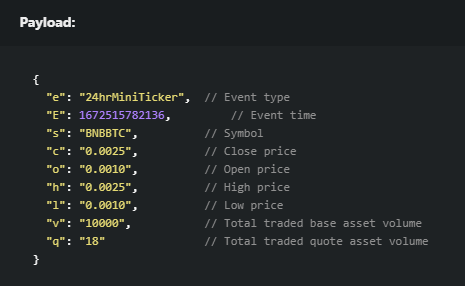
    
**Different Market Streams available :** https://binance-docs.github.io/apidocs/spot/en/#websocket-market-streams



In [5]:
#subscribe to the stream
#twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

In [6]:
#while True:
#    time.sleep(20)
#    twm.stop()
#    break
#파이썬 스크립트에서만 사용가능

#### **Option 2 : BinanceSocketManager(쥬피터에서 사용 가능!):**

In [7]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [8]:
def stream_data(msg):
    '''define how to process incoming WebSocket message'''
    print(msg)

In [9]:
#1.client 생성
#2.BinanceSocketManager 초기화 후 usdt에 대한 symbol_miniticker_socket을 구독
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol="BTCUSDT")
    async with ts as tscm:
        for _ in range(n): #This is hust an example to limit the number of messages. Remove or adjust
            res = await tscm.recv()
            stream_data(res)
    await client.close_connection()

In [10]:
n = 10 #stop stram after 10 messages

In [11]:
await main() # start stream in Jupyter

{'e': '24hrMiniTicker', 'E': 1707261024099, 's': 'BTCUSDT', 'c': '43167.57000000', 'o': '42503.89000000', 'h': '43399.98000000', 'l': '42484.39000000', 'v': '24716.64341000', 'q': '1062500600.70006620'}
{'e': '24hrMiniTicker', 'E': 1707261025361, 's': 'BTCUSDT', 'c': '43167.57000000', 'o': '42503.88000000', 'h': '43399.98000000', 'l': '42484.39000000', 'v': '24716.63827000', 'q': '1062500386.81616450'}
{'e': '24hrMiniTicker', 'E': 1707261026150, 's': 'BTCUSDT', 'c': '43167.57000000', 'o': '42503.89000000', 'h': '43399.98000000', 'l': '42484.39000000', 'v': '24716.65947000', 'q': '1062501303.40221610'}
{'e': '24hrMiniTicker', 'E': 1707261027479, 's': 'BTCUSDT', 'c': '43167.58000000', 'o': '42503.89000000', 'h': '43399.98000000', 'l': '42484.39000000', 'v': '24716.68444000', 'q': '1062502393.40877880'}
{'e': '24hrMiniTicker', 'E': 1707261028180, 's': 'BTCUSDT', 'c': '43167.57000000', 'o': '42503.88000000', 'h': '43399.98000000', 'l': '42484.39000000', 'v': '24716.69357000', 'q': '1062502

In [12]:
#asyncio.run(main()) # start stream in Script!